In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_list = []
for m in range(1,13):
    df = pd.read_csv(f'../data/interim/lichess_db_standard_rated_2020-{m:02d}.eval.blunders.csv')
    print(f"2020-{m:02d}:",len(df),"rows")
    df['Date'] = pd.to_datetime(f'2020-{m:02d}')
    df_list.append(df)

df_data = pd.concat([d for d in df_list])
df_data.head()

2020-01: 778722 rows
2020-02: 785708 rows
2020-03: 785573 rows
2020-04: 765804 rows
2020-05: 779387 rows
2020-06: 791979 rows
2020-07: 808481 rows
2020-08: 794475 rows
2020-09: 865472 rows
2020-10: 819039 rows
2020-11: 815354 rows
2020-12: 871235 rows
CPU times: user 10.7 s, sys: 708 ms, total: 11.4 s
Wall time: 11.4 s


,Move,FEN,Turn,Elo,TimeControl,ElapsedSeconds,Date
0,Bc3,r1b2rk1/pp3pbp/6p1/2pN4/2Pqp3/8/P1RBBnPP/1Q3RK...,20,1581,300+3,201.0,2020-01-01
1,Nf2+,r1b2rk1/pp3pbp/6p1/2pN4/2Pqp3/2B4n/P1R1B1PP/1Q...,21,1595,300+3,16.0,2020-01-01
2,Kg1,r1b2rk1/pp3pbp/6p1/2pN4/2Pqp3/2B5/P1R1BnPP/1Q3...,22,1581,300+3,160.0,2020-01-01
3,Nf2+,r1b2rk1/pp3pbp/6p1/2pN4/2Pqp3/2B4n/P1R1B1PP/1Q...,23,1595,300+3,17.0,2020-01-01
4,Bxe4,rn1qkb1r/ppp1pppp/5n2/5bN1/4P3/8/PPP2PPP/RNBQK...,5,1496,60+0,58.0,2020-01-01


# Explore by Elo

In [3]:
grouped_by_elo = df_data.groupby( pd.cut(df_data['Elo'], np.arange(600, 3000, 200)) )
grouped_by_elo.size()

Elo
(600, 800]        56676
(800, 1000]      452768
(1000, 1200]    1228812
(1200, 1400]    1863139
(1400, 1600]    2141080
(1600, 1800]    1800378
(1800, 2000]    1240169
(2000, 2200]     603594
(2200, 2400]     203628
(2400, 2600]      51678
(2600, 2800]      13784
dtype: int64

In [4]:
for low_thr in range(600,2600,200):
    vc = grouped_by_elo.get_group(pd.Interval(low_thr, low_thr+200, closed='right')).value_counts(['Move', 'FEN'])
    #with pd.option_context('display.max_rows', 8):
    print(f"Elo: ({low_thr},{low_thr+200}]")
    print(vc[vc>1].head(5))
    print("---")

Elo: (600,800]
Move  FEN                                                             
g6    rnbqkbnr/pppp1ppp/8/4p2Q/4P3/8/PPPP1PPP/RNB1KBNR b KQkq - 1 2       51
Qh4   rnbqkbnr/pppp1ppp/8/4p3/4P3/5N2/PPPP1PPP/RNBQKB1R b KQkq - 1 2       9
f3    rnbqkb1r/pppp1ppp/8/4N3/4n3/8/PPPP1PPP/RNBQKB1R w KQkq - 0 4         8
Bc4   rnbqkbnr/ppp1pppp/8/3p4/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 0 2         7
Nxd5  r1bqkbnr/ppp1pppp/2n5/3p4/3P4/2N5/PPP1PPPP/R1BQKBNR w KQkq - 2 3     7
dtype: int64
---
Elo: (800,1000]
Move  FEN                                                                 
g6    rnbqkbnr/pppp1ppp/8/4p2Q/4P3/8/PPPP1PPP/RNB1KBNR b KQkq - 1 2           307
g4    r1bqkb1r/pppp1ppp/2n2n2/4p3/2B1P3/5Q2/PPPP1PPP/RNB1K1NR w KQkq - 4 4     65
Nd4   r1bqkbnr/pppp1ppp/2n5/3Pp3/4P3/8/PPP2PPP/RNBQKBNR b KQkq - 0 3           53
Ng5   r1bqk1nr/pppp1ppp/2n5/2b1p3/2B1P3/5N2/PPPP1PPP/RNBQK2R w KQkq - 4 4      47
Nd4   rnbqkbnr/ppp1pppp/8/8/4p3/5N2/PPPP1PPP/RNBQKB1R w KQkq - 0 3             43
dtype: int6

# Explore by Date

In [5]:
grouped_by_elo = df_data.groupby( [pd.cut(df_data['Elo'], np.arange(600, 3000, 200)),'Date'] )
grouped_by_elo.size()

Elo           Date      
(600, 800]    2020-01-01    2849
              2020-02-01    2982
              2020-03-01    2269
              2020-04-01    2765
              2020-05-01    2970
                            ... 
(2600, 2800]  2020-08-01    1571
              2020-09-01    1187
              2020-10-01     956
              2020-11-01     914
              2020-12-01     895
Length: 132, dtype: int64

In [6]:
for low_thr in [1600]:#range(600,2600,200):
    for date in pd.date_range(start='2020-01', periods=12, freq=pd.offsets.MonthBegin()):
        vc = grouped_by_elo.get_group((pd.Interval(low_thr, low_thr+200, closed='right'),date)).value_counts(['Move', 'FEN'])
        print(f"Date: {date}. Elo: ({low_thr},{low_thr+200}]")
        print(vc[vc>1].head(5))
    print("---")

Date: 2020-01-01 00:00:00. Elo: (1600,1800]
Move  FEN                                                           
Bg4   rnbqkbnr/ppp1pppp/8/3P4/8/8/PPPP1PPP/RNBQKBNR b KQkq - 0 2        11
Bc4   rnbqkbnr/ppp1pppp/8/3p4/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 0 2       8
h6    rnbqkb1r/ppp1pppp/5n2/6N1/8/3B4/PPP2PPP/RNBQK2R b KQkq - 0 5       7
Nxe5  r1bqkbnr/pppp1ppp/2n5/4P3/4P3/8/PPPP2PP/RNBQKBNR b KQkq - 0 3      7
fxe5  r1bqkbnr/pppp1ppp/2n5/4p3/4PP2/8/PPPP2PP/RNBQKBNR w KQkq - 1 3     6
dtype: int64
Date: 2020-02-01 00:00:00. Elo: (1600,1800]
Move   FEN                                                             
Bxf7+  r1bqkbnr/pppp1ppp/2n5/4p3/2B1P3/8/PPPP1PPP/RNBQK1NR w KQkq - 2 3    14
Bc4    rnbqkbnr/ppp1pppp/8/3p4/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 0 2        13
cxb5   rnbqkbnr/p3pppp/2p5/1P6/2pP4/4P3/1P3PPP/RNBQKBNR b KQkq - 0 5       12
Bg4    rnbqkbnr/ppp1pppp/8/3P4/8/8/PPPP1PPP/RNBQKBNR b KQkq - 0 2          10
Bc3    r1b1kbnr/pppp1ppp/2n5/4P3/8/5N2/PqPBPPPP/RN1QKB1R w KQkq - 0 6  

# Explore by plots

In [7]:
vc = df_data.value_counts(['Move', 'FEN'])
vc_gt400 = vc[vc>400]

CPU times: user 37.1 s, sys: 1.1 s, total: 38.2 s
Wall time: 38.2 s


<AxesSubplot:xlabel='Move'>

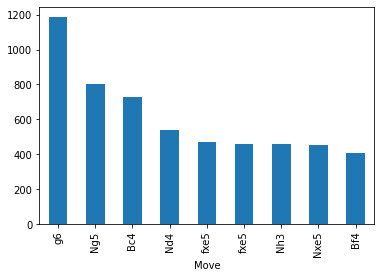

In [29]:
vc_gt400.reset_index().plot(kind='bar',x='Move',legend=None) #.get_figure(); x.savefig('png', dpi=200)

In [18]:
#s = df_data.groupby(['Date','Move','FEN']).size().sort_values(ascending=False).to_frame('size')
s = df_data.value_counts(['Date', 'Move', 'FEN']).sort_values(ascending=False).to_frame('size')
s = s.reset_index().set_index('Date').sort_index()

data_dict = {}
for move, group in s[s['size']>400].groupby('Move'):
    data_dict[move] = {'date': [], 'size': []}
    data_dict[move]['date'] = [t.to_pydatetime() for t in group.index]
    data_dict[move]['size'] = group['size'].to_list()
    #plt.plot(x,y, label=move)

sorted_data = sorted(data_dict.items(), key = lambda kv:data_dict[kv[0]]['size'][-1], reverse=True)

'''
for row in sorted_data:
    move = row[0]
    x = row[1]['date']
    y = row[1]['size']
    plt.plot(x,y, label=move)

plt.legend(loc='right', bbox_to_anchor=(1.5,0.5))
plt.show()
'''

CPU times: user 46.9 s, sys: 796 ms, total: 47.7 s
Wall time: 47.6 s


"\nfor row in sorted_data:\n    move = row[0]\n    x = row[1]['date']\n    y = row[1]['size']\n    plt.plot(x,y, label=move)\n\nplt.legend(loc='right', bbox_to_anchor=(1.5,0.5))\nplt.show()\n"